# Analysing the extent of Missing Data

**Approved Pool of 30 Features**

* Planet Physical Properties

1. P_MASS - Planet Mass (EU)
2. P_RADIUS - Planet Radius (EU)
3. P_DENSITY - Planet Density (EU)
4. P_GRAVITY - Planet Surface Gravity (EU)
5. P_ESCAPE - Planet Escape Velocity (EU)
6. P_TYPE - Planet Type (e.g., Super Earth, Gas Giant)

* Planet Orbital Parameters

7. P_PERIOD - Orbital Period (days) 
8. P_SEMI_MAJOR_AXIS - Mean distance from the star (AU) 
9. P_ECCENTRICITY - Orbital Eccentricity 
10. P_INCLINATION - Orbital Inclination (degrees) 
11. P_OMEGA - Argument of Periastron 
12. P_PERIASTRON - Periastron distance (AU) 
13. P_APASTRON - Apastron distance (AU) 
14. P_IMPACT_PARAMETER - Transit Impact Parameter 
15. P_HILL_SPHERE - Radius of the Hill Sphere (AU)

* Stellar Properties (Host Star)

16. S_MASS - Star Mass (SU)
17. S_RADIUS - Star Radius (SU)
18. S_LUMINOSITY - Star Luminosity (SU)
19. S_TEMPERATURE - Star Effective Temperature (K)
20. S_AGE - Star Age (Gyrs)
21. S_METALLICITY - Star Metallicity ([Fe/H])
22. S_LOG_G - Star Surface Gravity
23. S_TYPE - Star Spectral Type
24. S_MAG - Star Magnitude
25. S_DISC - Presence of a circumstellar disc
26. S_MAGNETIC_FIELD - Star Magnetic Field presence

* System & Meta Data 

27. S_SNOW_LINE - Snow Line Distance (AU) 
28. S_TIDAL_LOCK - Tidal Lock Limit Distance (AU) 
29. P_DETECTION - Method of Detection (e.g., Transit, Radial Velocity) 
30. P_DISTANCE - Distance of the system from Earth (pc)

In [143]:
import pandas as pd
import matplotlib.pyplot as plt

In [144]:
approved_feature = ['P_MASS', 'P_RADIUS', 'P_DENSITY', 'P_GRAVITY',
                    'P_ESCAPE', 'P_TYPE', 'P_PERIOD', 'P_SEMI_MAJOR_AXIS',
                    'P_ECCENTRICITY', 'P_INCLINATION', 'P_OMEGA', 'P_PERIASTRON',
                    'P_APASTRON', 'P_IMPACT_PARAMETER', 'P_HILL_SPHERE', 'S_MASS',
                    'S_RADIUS', 'S_LUMINOSITY', 'S_TEMPERATURE', 'S_AGE', 
                    'S_METALLICITY', 'S_LOG_G', 'S_TYPE', 'S_MAG', 'S_DISC',
                    'S_MAGNETIC_FIELD', 'S_SNOW_LINE', 'S_TIDAL_LOCK', 'P_DETECTION', 
                    'P_DISTANCE']

In [145]:
# loading the dataset
data = pd.read_csv("https://raw.githubusercontent.com/opencodeiiita/habitable-planet-hunter/main/datasets/full_data.csv")

In [146]:
req_data = data[approved_feature]

n_missing = req_data.isna().sum()
missing_percent = n_missing * 100 / 4048

outcomes = pd.DataFrame({'total_record': 4048, 
                         'not_missing': 4048-n_missing,
                         'missing': n_missing,
                         'percentage_of_missing_data' : round(missing_percent,2)})

outcomes = outcomes.sort_values(by='percentage_of_missing_data')

outcomes

,total_record,not_missing,missing,percentage_of_missing_data
P_DETECTION,4048,4048,0,0.00
P_TYPE,4048,4031,17,0.42
P_APASTRON,4048,3978,70,1.73
P_PERIASTRON,4048,3978,70,1.73
P_DISTANCE,4048,3978,70,1.73
P_PERIOD,4048,3938,110,2.72
S_MAG,4048,3869,179,4.42
S_TEMPERATURE,4048,3841,207,5.11
S_SNOW_LINE,4048,3786,262,6.47
S_LUMINOSITY,4048,3786,262,6.47


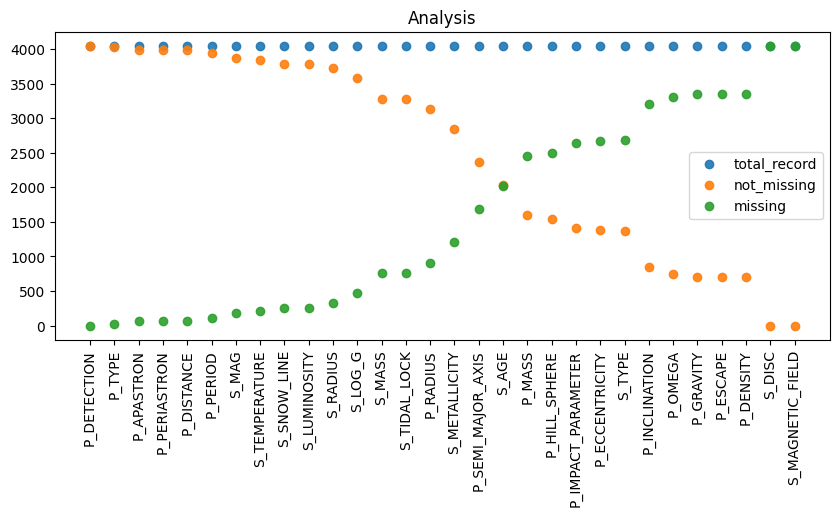

In [147]:
plt.figure(figsize=(10,4))
plt.plot(outcomes.drop('percentage_of_missing_data', axis=1), marker='o', linestyle='None', alpha=0.9)
plt.xticks(rotation=90)
plt.title("Analysis")
plt.legend(['total_record', 'not_missing', 'missing'])
plt.show()

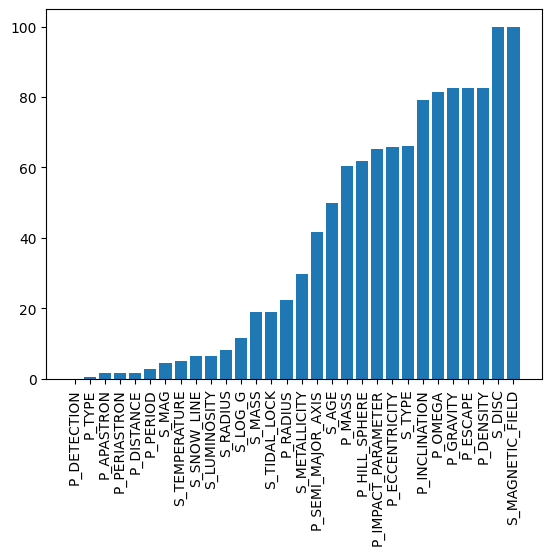

In [148]:
plt.bar(outcomes.index, outcomes.percentage_of_missing_data)
plt.xticks(rotation=90)
plt.show()

**Looking on the data shows some pattern**

1. **70 Missing Records**
    * *P_APASTRON*
    * *P_PERIASTRON*
    * *P_DISTANCE*
2. **262 Missing Records**
    * *S_SNOW_LINE*
    * *S_LUMINOSITY*
3. **3342 Missing Records**
    * *P_GRAVITY*
    * *P_ESCAPE*
    * *P_DENSITY*
4. **4048(100%) Missing Records**
    * *S_DISC*
    * *S_MAGNETIC_FIELD*
* It is important to check whether the features having same number of missing records have values missing for same records or different

In [149]:
# Checking
one = req_data[['P_APASTRON', 'P_PERIASTRON', 'P_DISTANCE']][req_data.P_APASTRON.isna()].nunique() 
two = req_data[['S_SNOW_LINE', 'S_LUMINOSITY']][req_data.S_SNOW_LINE.isna()].nunique()
three = req_data[['P_GRAVITY', 'P_ESCAPE', 'P_DENSITY']][req_data.P_GRAVITY.isna()].nunique()
four = req_data[['S_DISC', 'S_MAGNETIC_FIELD']][req_data.S_DISC.isna()].nunique()
pd.concat([one, two, three, four])

P_APASTRON          0
P_PERIASTRON        0
P_DISTANCE          0
S_SNOW_LINE         0
S_LUMINOSITY        0
P_GRAVITY           0
P_ESCAPE            0
P_DENSITY           0
S_DISC              0
S_MAGNETIC_FIELD    0
dtype: int64

# Summary

|S.No.|FEATURES|-|MISSING %|\||S.No.|FEATURES|-|MISSING %|
|-----|--------|-|---------|-|-----|--------|-|---------|
|1|P_DETECTION |-| 0.00 |\|| 2 | P_TYPE          |-|        0.42|
|3|P_APASTRON       |-|       1.73 |\|| 4| P_PERIASTRON     |-|       1.73|
|5|P_DISTANCE        |-|      1.73 |\|| 6| P_PERIOD         |-|       2.72|
|7|S_MAG             |-|      4.42 |\|| 8| S_TEMPERATURE    |-|       5.11|
|9|S_SNOW_LINE     |-|        6.47 |\|| 10| S_LUMINOSITY     |-|       6.47|
|11|S_RADIUS        |-|        8.03 |\| |12| S_LOG_G          |-|      11.68|
|13|S_MASS           |-|      18.90 |\| |14| S_TIDAL_LOCK      |-|     18.95|
|15|P_RADIUS         |-|      22.46 |\| |16| S_METALLICITY      |-|    29.79|
|17|P_SEMI_MAJOR_AXIS |-|     41.53 |\| |18| S_AGE             |-|     49.83|
|19|P_MASS            |-|     60.52 |\| |20| P_HILL_SPHERE     |-|     61.81|
|21|P_IMPACT_PARAMETER |-|    65.19 |\| |22| P_ECCENTRICITY   |-|      65.91|
|23|S_TYPE           |-|      66.16 |\| |24| P_INCLINATION    |-|      79.15|
|25|P_OMEGA          |-|      81.57 |\||26| P_GRAVITY        |-|      82.56|
|27|P_ESCAPE        |-|       82.56 |\| |28| P_DENSITY        |-|      82.56|
|29|S_DISC            |-|    100.00 |\| |30| S_MAGNETIC_FIELD  |-|    100.00|

**The features in each of the four sets below are interdependent, i.e., if one is missing then the others are also missing.**
1. **70 Missing Records**
    * *P_APASTRON*
    * *P_PERIASTRON*
    * *P_DISTANCE*
2. **262 Missing Records**
    * *S_SNOW_LINE*
    * *S_LUMINOSITY*
3. **3342 Missing Records**
    * *P_GRAVITY*
    * *P_ESCAPE*
    * *P_DENSITY*
4. **4048(100%) Missing Records**
    * *S_DISC*
    * *S_MAGNETIC_FIELD*

*This is an obvious things because these set of features have some real world relations*

**NOTE** : S_DISC and S_MAGNETIC_FIELD are totally missing. This implies that it does not make any sense to include these features, unless they are a topic of research (target)